# Distribuciones de probabilidad

Contenido:
1. Familias paramétricas especiales
2. Aproximando distribuciones
3. Regressión de Poisson

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Familias paramétricas especiales



Una **familia paramétrica** de distribuciones de probabilidad es un conjunto de distribuciones caracterizadas por uno o más parámetros. Estos parámetros controlan aspectos fundamentales de la distribución, como su forma o ubicación.

Matemáticamente, una familia paramétrica se representa como:

$$
\{ f(x; \theta) \mid \theta \in \Theta \}
$$

Donde:
- $f(x; \theta)$ es la función de densidad de probabilidad (o de masa, si es discreta) para una variable aleatoria $X$.
- $\theta$ es el vector de parámetros que describe la distribución.
- $\Theta$ es el espacio paramétrico, es decir, el conjunto de valores posibles para los parámetros.


En este notebook presentaremos las familias paramétricas de las distribuciones univariadas ($x \in \mathbb{R}$) más importantes.

En Python, podemos trabajar con estadística y distribuciones de probabilidad utilizando  la biblioteca de **SciPy**. En particular, **SciPy** tiene un módulo llamado `scipy.stats` que incluye una amplia variedad de distribuciones (continuas y discretas).

### Distribuciones discretas

#### Distribución Uniforme Discreta

La **distribución uniforme discreta** asigna la misma probabilidad a cada valor discreto en un conjunto finito de posibles resultados. Su función de masa de probabilidad (PMF) es:

$$
P(X = x) = \frac{1}{b - a + 1} \quad \text{para} \quad x = a, a+1, \dots, b
$$

Donde:
- $a$: el valor mínimo posible.
- $b$: el valor máximo posible.

**Ejemplo:**
Si lanzamos un dado de 6 caras, la probabilidad de obtener un número específico entre 1 y 6 es uniforme, es decir, $P(X = x) = \frac{1}{6}$.

Resultados de los experimentos:  [6 3 5 ... 1 6 2]


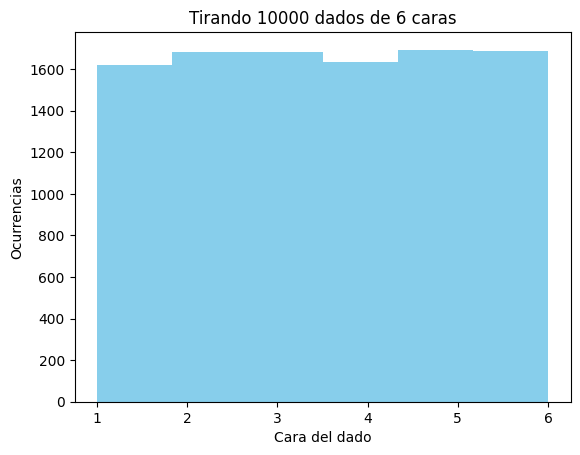

In [128]:
from scipy.stats import randint

# Definimos una distribución uniforme discreta entre 1 y 6
a, b = 1, 6
uniform_discrete = randint(a, b+1)

# Tiramos 10,000 dados
n_samples = 10000
samples = uniform_discrete.rvs(size=n_samples)
print('Resultados de los experimentos: ',samples)

# Graficamos el histograma
plt.hist(samples, bins=6, color='skyblue')
plt.title(f"Tirando {n_samples} dados de 6 caras")
plt.xlabel("Cara del dado")
plt.ylabel("Ocurrencias")
plt.show()

#### Distribución Bernoulli

La **distribución Bernoulli** describe un experimento con dos resultados posibles: éxito (1) o fracaso (0). Su función de masa de probabilidad (PMF) es:

$$
P(X = x) = p^x(1-p)^{1-x} \quad \text{para} \quad x = 0, 1
$$

Donde:
- $p$: la probabilidad de éxito (0 ≤ $p$ ≤ 1).

**Ejemplo:**
El lanzamiento de una moneda, donde 1 representa cara (éxito) y 0 representa cruz (fracaso), con $p = 0.5$.

Resultados de los experimentos:  [1 1 1 ... 1 1 1]


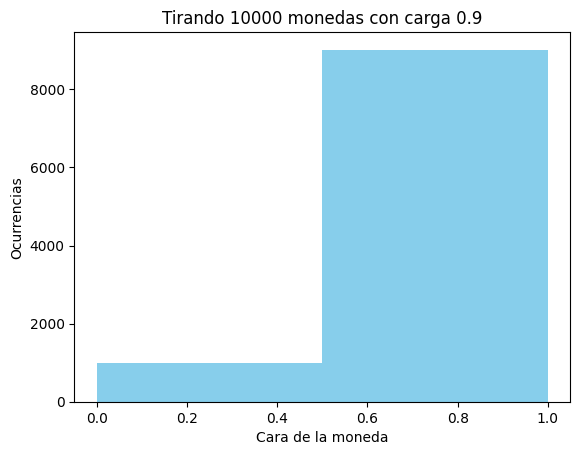

In [129]:
from scipy.stats import bernoulli

# Definimos una distribución Bernoulli con probabilidad de éxito p
p = 0.9
bernoulli_dist = bernoulli(p)

# Tiramos 10,000 monedas
n_samples = 10000
samples = bernoulli_dist.rvs(size=n_samples)
print('Resultados de los experimentos: ',samples)

# Graficar el histograma
plt.hist(samples, bins=2, color='skyblue')
plt.title(f"Tirando {n_samples} monedas con carga {p}")
plt.xlabel("Cara de la moneda")
plt.ylabel("Ocurrencias")
plt.show()

### Distribución Binomial

La **distribución binomial** describe el número de éxitos en una secuencia de $n$ experimentos independientes, cada uno con una probabilidad $p$ de éxito. Su función de masa de probabilidad (PMF) es:

$$
P(X = x) = \binom{n}{x} p^x (1-p)^{n-x}
$$

Donde:
- $n$: el número de ensayos.
- $p$: la probabilidad de éxito en cada ensayo.

**Ejemplo:**
En 10 lanzamientos de una moneda justa, la probabilidad de obtener exactamente 3 caras ($p = 0.5$, $n = 10$).


Resultados de los experimentos:  [3 5 5 ... 6 4 4]


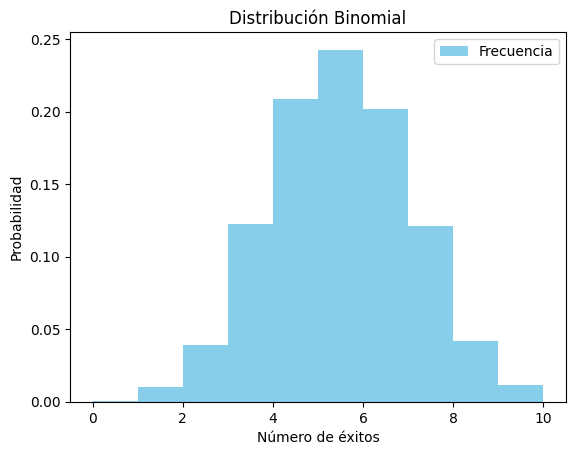

In [146]:
from scipy.stats import binom

# Definimos una distribución binomial con n=10 y p=0.5
n, p = 10, 0.5
binom_dist = binom(n, p)

# Generamos 10,000 muestras
n_samples = 10000
samples = binom_dist.rvs(size=n_samples)
print('Resultados de los experimentos: ',samples)

# Graficamos el histograma
plt.hist(samples, bins=range(0, n+1), density=True, color='skyblue', label="Frecuencia")
plt.title("Distribución Binomial")
plt.xlabel("Número de éxitos")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

### Distribución Poisson

La **distribución Poisson** describe el número de eventos que ocurren en un intervalo de tiempo fijo o en un área espacial, bajo ciertas condiciones. Su función de masa de probabilidad (PMF) es:

$$
P(X = x) = \frac{\lambda^x e^{-\lambda}}{x!}
$$

Donde:
- $\lambda$: la tasa promedio de eventos en un intervalo dado.

**Ejemplo:**
Si un restaurante recibe en promedio 4 clientes por hora, la probabilidad de recibir exactamente 3 clientes en una hora.


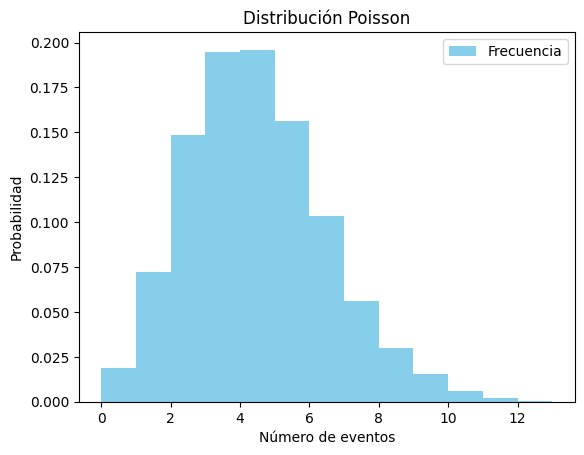

In [147]:
from scipy.stats import poisson

# Definimos una distribución Poisson con lambda = 4
lambda_ = 4
poisson_dist = poisson(lambda_)

# Generamos 10,000 muestras
n_samples = 10000
samples = poisson_dist.rvs(size=n_samples)

# Graficamos el histograma
plt.hist(samples, bins=range(0, max(samples)+1), density=True, color='skyblue', label="Frecuencia")
plt.title("Distribución Poisson")
plt.xlabel("Número de eventos")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

### Distribuciones continuas

### Distribución Uniforme Continua

La **distribución uniforme continua** describe una variable aleatoria cuyo valor tiene la misma probabilidad de caer en cualquier intervalo dentro de un rango continuo. Su función de densidad es:

$$
f(x) = \frac{1}{b - a} \quad \text{para} \quad a \leq x \leq b
$$

Donde:
- $a$: el límite inferior del intervalo.
- $b$: el límite superior del intervalo.

**Ejemplo:**
La probabilidad de que un número caiga entre 0 y 1 en una distribución uniforme continua.


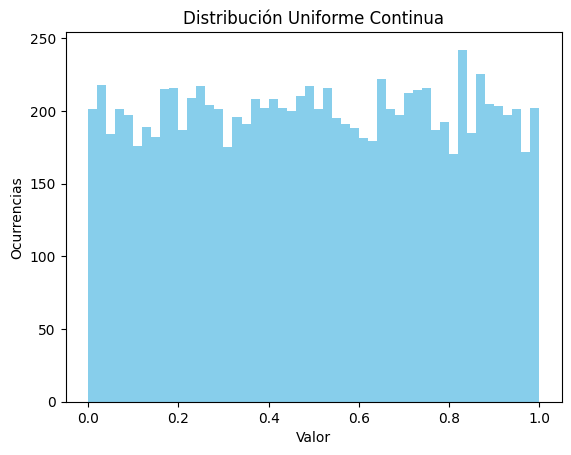

In [159]:
from scipy.stats import uniform

# Definimos una distribución uniforme continua entre 0 y 1
a, b = 0, 1
uniform_cont_dist = uniform(a, b-a)

# Generamos 10,000 muestras
n_samples = 10000
samples = uniform_cont_dist.rvs(size=n_samples)

# Graficamos el histograma
plt.hist(samples, bins=50, color='skyblue')
plt.title("Distribución Uniforme Continua")
plt.xlabel("Valor")
plt.ylabel("Ocurrencias")
plt.show()

### Distribución Normal

La **distribución normal** (o gaussiana) es una de las distribuciones más importantes en probabilidad y estadística. Su función de densidad de probabilidad (PDF) es:

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

Donde:
- $\mu$: la media (centro) de la distribución.
- $\sigma$: la desviación estándar (amplitud) de la distribución.

**Ejemplo:**
Las alturas de personas adultas suelen aproximarse a una distribución normal. Supongamos una media de $\mu = 170$ cm y una desviación estándar de $\sigma = 10$ cm.

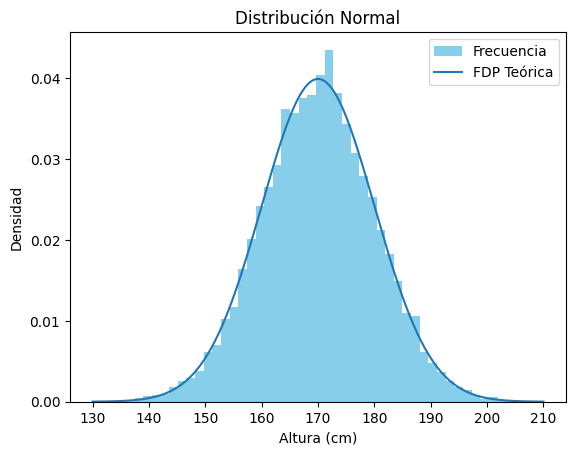

In [166]:
from scipy.stats import norm

# Parámetros de la distribución normal
mu, sigma = 170, 10  # Media y desviación estándar

# Generamos 10,000 muestras aleatorias
n_samples = 10000
samples = norm.rvs(loc=mu, scale=sigma, size=n_samples)

# Graficamos el histograma junto con la fdp teórica
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = norm.pdf(x, loc=mu, scale=sigma)

plt.hist(samples, bins=50, density=True, color='skyblue', label="Frecuencia")
plt.plot(x, pdf, label="FDP Teórica")
plt.title("Distribución Normal")
plt.xlabel("Altura (cm)")
plt.ylabel("Densidad")
plt.legend()
plt.show()

### Distribución Exponencial

La **distribución exponencial** describe el tiempo entre eventos en un proceso de Poisson. Su función de densidad de probabilidad (PDF) es:

$$
f(x) = \lambda e^{-\lambda x} \quad \text{para} \quad x \geq 0
$$

Donde:
- $\lambda$: la tasa promedio de ocurrencia de eventos.

**Ejemplo:**
El tiempo entre llegadas de clientes a una tienda con una tasa de $\lambda = 2$ llegadas por minuto.


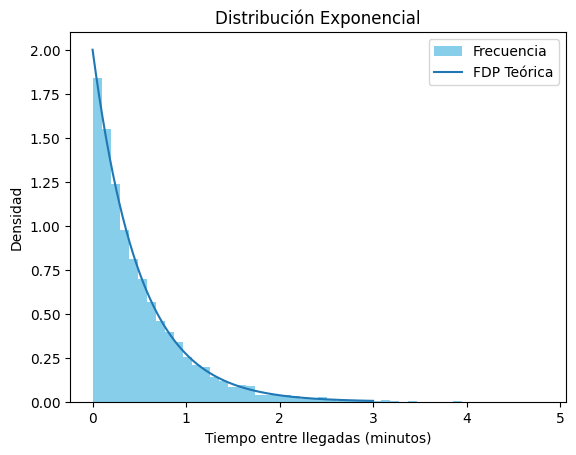

In [165]:
from scipy.stats import expon
import matplotlib.pyplot as plt

# Parámetro de la distribución exponencial
lambda_ = 2  # Tasa de ocurrencia (eventos/minuto)

# Generamos 10,000 muestras aleatorias
n_samples = 10000
samples = expon.rvs(scale=1/lambda_, size=n_samples)

# Graficamos el histograma y la fdp teórica
x = np.linspace(0, 3, 1000)
pdf = expon.pdf(x, scale=1/lambda_)

plt.hist(samples, bins=50, density=True, color='skyblue', label="Frecuencia")
plt.plot(x, pdf, label="FDP Teórica")
plt.title("Distribución Exponencial")
plt.xlabel("Tiempo entre llegadas (minutos)")
plt.ylabel("Densidad")
plt.legend()
plt.show()


Referencia: Capítulo 3 de Introduction to the Theory of Statistics. Mood, Graybill & Boes.

## Aproximando distribuciones

### Binomial vía Poisson

La **distribución binomial** $Bin(n, p)$ puede aproximarse mediante una **distribución Poisson** $Po(\lambda)$ bajo ciertas condiciones. Esto ocurre cuando el número de ensayos $n$ es grande y la probabilidad de éxito $p$ es pequeña, lo que mantiene constante el valor esperado $\lambda = n \cdot p$.

**Condiciones necesarias:**
1. $n$ (el número de ensayos) debe ser grande.
2. $p$ (la probabilidad de éxito en cada ensayo) debe ser pequeño.
3. El valor esperado $\lambda = n \cdot p$ debe permanecer fijo.

La función de probabilidad de la binomial es:
$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k = 0, 1, 2, \dots, n
$$

Y la de la Poisson es:
$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0, 1, 2, \dots
$$

**Ejemplo:**
Aproximemos $B(1000, 0.01)$ con una $Po(\lambda = 1000 \cdot 0.01 = 10)$ y comparemos ambas distribuciones.


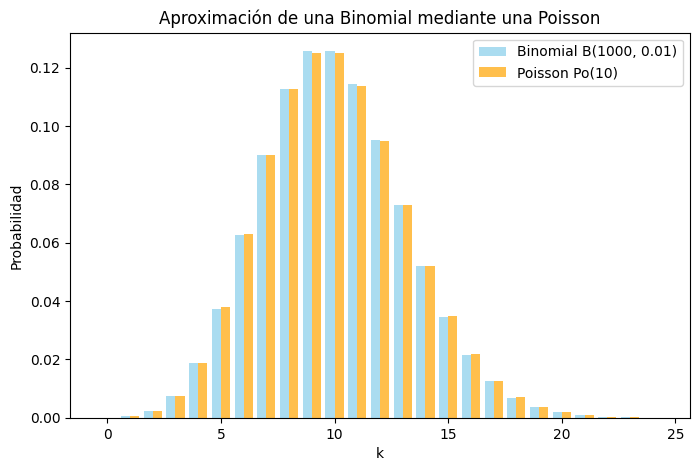

In [172]:
# Parámetros de la binomial
n, p = 1000, 0.01

 # Parámetro de la Poisson
lambda_ = n * p 

# Rango de valores
k = np.arange(0, 25)

# Distribuciones
binom_probs = binom.pmf(k, n, p)  # Probabilidades de la Binomial
poisson_probs = poisson.pmf(k, lambda_)  # Probabilidades de la Poisson

# Graficamos ambas distribuciones
plt.figure(figsize=(8, 5))
plt.bar(k - 0.2, binom_probs, width=0.4, label="Binomial B(1000, 0.01)", color="skyblue", alpha=0.7)
plt.bar(k + 0.2, poisson_probs, width=0.4, label="Poisson Po(10)", color="orange", alpha=0.7)
plt.title("Aproximación de una Binomial mediante una Poisson")
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()


### Teorema del límite central

El **Teorema del Límite Central (TLC)** establece que, bajo ciertas condiciones, la suma (o promedio) de un gran número de variables aleatorias independientes y con la misma distribución (i.i.d.) tiende a seguir una distribución normal, independientemente de la distribución original de las variables.

Formalmente:
Sea $\{X_1, \dots, X_n\}$ una secuencia de variables aleatorias i.i.d. (independientes e idénticamente distribuidas) con valor esperado $\mu$ y varianza finita $\sigma^2$. Supongamos que nos interesa el promedio muestral definido como:

$$
\bar{X}_n \equiv \frac{X_1 + \cdots + X_n}{n}
$$

Según la **Ley de los Grandes Números**, el promedio muestral $\bar{X}_n$ converge casi seguramente (y por lo tanto también converge en probabilidad) al valor esperado $\mu$ a medida que $n \to \infty$.

El **Teorema del Límite Central (TLC)** establece que, además de la convergencia del promedio muestral, la distribución de la normalización de la suma de estas variables aleatorias se aproxima a una distribución normal estándar, independientemente de la distribución original de las variables. Es decir, la distribución de

$$
Z_n = \frac{\sum_{i=1}^n X_i - n\mu}{\sigma \sqrt{n}}
$$

tiende a una distribución normal estándar $\mathcal{N}(0, 1)$ cuando $n \to \infty$.

Este teorema es crucial porque permite usar la distribución normal para aproximar sumas de variables aleatorias, incluso cuando estas no siguen una distribución normal.







<img src='imgs/IllustrationCentralTheorem.png'>

Promedios de las muestras: [0.48908033 0.50367143 0.51396813 ... 0.4967533  0.45800018 0.52691351]


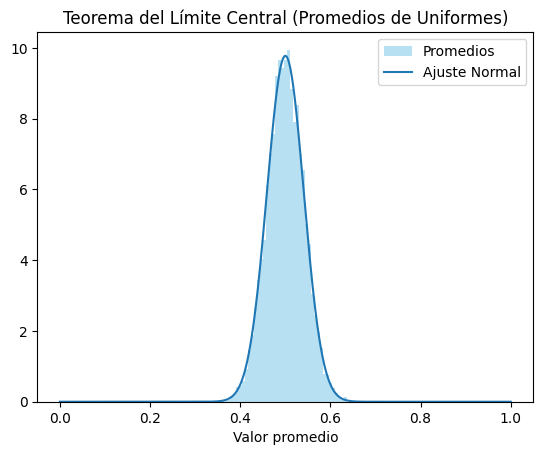

In [ ]:
# Generamos 10,000 muestras aleatorias de tamaño 50 de una distribución uniforme [0, 1]
n_samples = 10000
sample_size = 50
uniform_samples = uniform.rvs(size=(n_samples, sample_size))

# Calculamos los promedios de cada conjunto de muestras
sample_means = uniform_samples.mean(axis=1)
print('Promedios de las muestras:',sample_means)

# Graficamos los promedios y comparamos contra una distribución normal
x = np.linspace(0, 1, 1000)
normal_fit = norm.pdf(x, loc=0.5, scale=1 / (12 * sample_size)**0.5)  # Parámetros teóricos

plt.hist(sample_means, bins=50, density=True, alpha=0.6, color='skyblue', label="Promedios")
plt.plot(x, normal_fit, label="Ajuste Normal")
plt.title("Teorema del Límite Central (Promedios de Uniformes)")
plt.xlabel("Valor promedio")
plt.legend()
plt.show()

## Regresión de Poisson

La **regresión de Poisson** se usa para modelar variables de respuesta ($Y$) que representan conteos o tasas de ocurrencia de eventos. Es adecuada cuando se asume que $Y$ sigue una distribución Poisson.

**Modelo**

Se asume que el logaritmo de la esperanza de $Y$ se puede modelar como una combinación lineal de parámetros desconocidos.

Es decir, si $x^n \in \mathbb{R^n}$, el modelo se ve como

$ log(E(Y|x)) = \alpha + \beta x $,

o, alternativamente:

$ E(Y|x) = e^{\alpha + \beta x}$

Si las observaciones $Y_i$ son independientes y tienen valores correspondientes $\mathbf{x}_i$ de las variables predictoras, entonces los parámetros $\alpha, \beta$ puede ser estimado mediante **máxima verosimilitud**. Estos estimadores de máxima verosimilitud no tienen una expresión en forma cerrada y deben calcularse mediante métodos numéricos.

**¿Cuándo preferirla a una regresión lineal?**
- Cuando todas las observaciones son entero (el modelo de regresión lineal asumiría que los datos son continuos).
- Cuando el ruido parece ser mayor cuando las observaciones tienen valores grandes (el modelo de regresión lineal supone una varianza constante en todos los casos).
- Cuando las observaciones toman valores pequeños (el modelo de regresión lineal puede predecir valores negativos).


**Ejemplos de uso:**
- Modelar el número de accidentes de tránsito en función del clima y el tráfico.
- Predecir el número de ventas en una tienda según el día de la semana.
- Predecir el número de paradas policíacas según localidad (precinct, entre 1 y 75) y etnicidad (1 a 3)

In [14]:
import statsmodels.api as sm

url = "http://www.stat.columbia.edu/~gelman/arm/examples/police/frisk_with_noise.dat" 
df = pd.read_csv(url, skiprows=6, delimiter=" ")
df.head()

,stops,pop,past.arrests,precinct,eth,crime
0,75,1720,191,1,1,1
1,36,1720,57,1,1,2
2,74,1720,599,1,1,3
3,17,1720,133,1,1,4
4,37,1368,62,1,2,1


In [15]:
X = (df
    .groupby(['eth', 'precinct'])[["stops", "past.arrests"]]
    .sum()
    .reset_index()
    .pipe(pd.get_dummies, columns=['eth', 'precinct'])
    .assign(intercept=1)  # Adds a column called 'intercept' with all values equal to 1.
    .sort_values(by='stops')
    .reset_index(drop=True)
)

y = X.pop("stops")

In [25]:
X = X.astype(int)
X

,past.arrests,eth_1,eth_2,eth_3,precinct_1,precinct_2,precinct_3,precinct_4,precinct_5,precinct_6,...,precinct_67,precinct_68,precinct_69,precinct_70,precinct_71,precinct_72,precinct_73,precinct_74,precinct_75,intercept
0,16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,97,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,338,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,115,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,44,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2166,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
221,3468,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
222,4209,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
223,4540,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
y = y.astype(int)
y

0         7
1         7
2         9
3        11
4        11
       ... 
220    2467
221    2492
222    2500
223    2705
224    2771
Name: stops, Length: 225, dtype: int64

<Axes: >

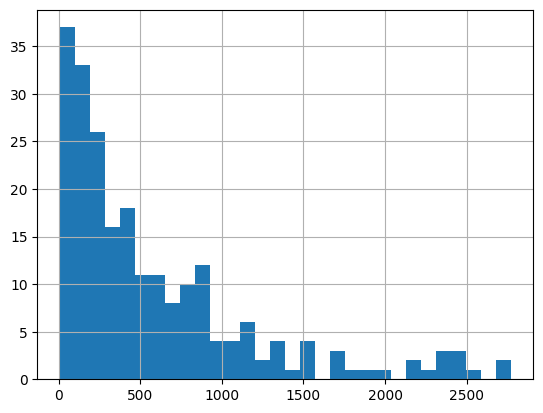

In [27]:
y.hist(bins=30)

### Entrando los modelos

In [28]:
model_no_indicators = sm.GLM(
    y,
    X["intercept"],
    offset=np.log(X["past.arrests"]),
    family=sm.families.Poisson(),
)
result_no_indicators = model_no_indicators.fit()
print(result_no_indicators.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  stops   No. Observations:                  225
Model:                            GLM   Df Residuals:                      224
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23913.
Date:                Fri, 13 Dec 2024   Deviance:                       46120.
Time:                        14:46:59   Pearson chi2:                 4.96e+04
No. Iterations:                     5   Pseudo R-squ. (CS):         -6.461e-14
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.5877      0.003   -213.058      0.0

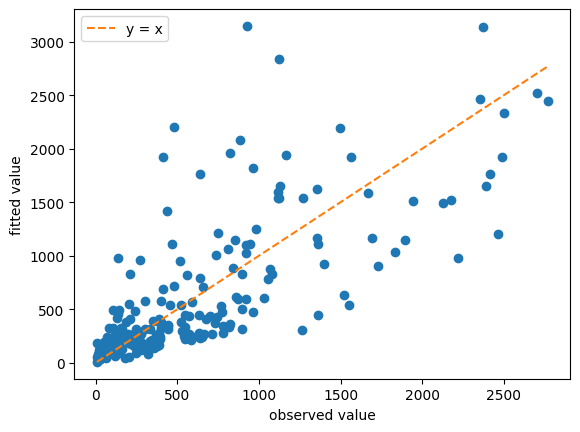

In [29]:
plt.plot(y, result_no_indicators.fittedvalues, 'o')
plt.plot(y, y, '--', label='y = x')
plt.ylabel("fitted value")
plt.xlabel("observed value")
plt.legend()
plt.show()

Añadiendo ethnicity y precinct como predictores

In [30]:
model_with_ethnicity_and_precinct = sm.GLM(
    y,
    X.drop(columns=["eth_1", "precinct_1", "past.arrests"]),
    offset=np.log(X["past.arrests"]),
    family=sm.families.Poisson(),
)

result_with_ethnicity_and_precinct = model_with_ethnicity_and_precinct.fit()
print(result_with_ethnicity_and_precinct.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  stops   No. Observations:                  225
Model:                            GLM   Df Residuals:                      148
Model Family:                 Poisson   Df Model:                           76
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.9
Date:                Fri, 13 Dec 2024   Deviance:                       3427.1
Time:                        14:47:04   Pearson chi2:                 3.24e+03
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
eth_2           0.0102      0.007      1.498      

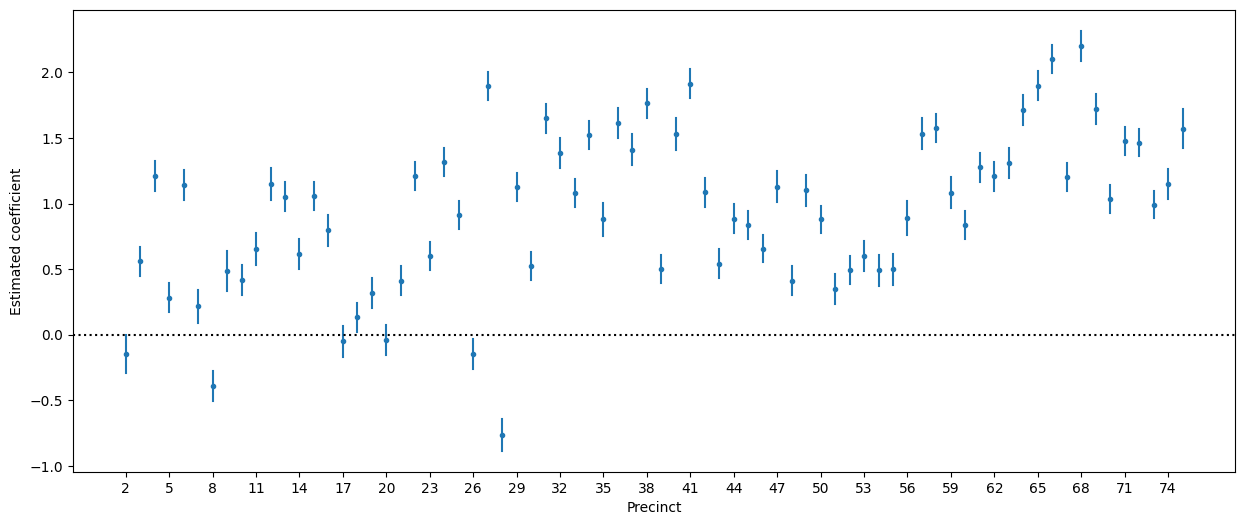

In [31]:
precinct_coefs = result_with_ethnicity_and_precinct.params.iloc[2:-1] # Only intersted in precinct
precinct_interval = result_with_ethnicity_and_precinct.conf_int().reindex(precinct_coefs.index)

plt.figure(figsize=(15, 6))
plt.plot(precinct_coefs, '.')
for precinct, interval in precinct_interval.iterrows():
    plt.plot([precinct, precinct], interval, color='C0')
plt.axhline(y=0, linestyle=':', color='black')
plt.xticks(
    precinct_coefs.index[::3],
    [int(x[1]) for x in precinct_coefs.index.str.split("_",)][::3]
)
plt.ylabel("Estimated coefficient")
plt.xlabel("Precinct")
plt.show()

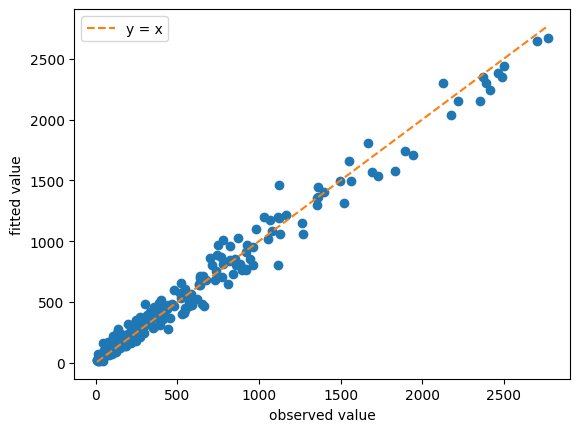

In [32]:
plt.plot(y, result_with_ethnicity_and_precinct.fittedvalues, 'o')
plt.plot(y, y, '--', label='y = x')
plt.ylabel("fitted value")
plt.xlabel("observed value")
plt.legend()
plt.show()